In [7]:
import matplotlib
matplotlib.use('agg')
%pylab inline
import breakout_detection
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from rpy2.robjects.packages import importr
import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()

Populating the interactive namespace from numpy and matplotlib


In [2]:
base = importr('base')
utils = importr('utils')
#ecp = importr('ecp')
#cp = importr('changepoint')

In [3]:
df = pd.read_csv('annotated.csv', sep = ',')
df['Annotate'] = df['Annotate'].astype(int)

In [4]:
X = np.column_stack((df['JOB_NAME'],df['MSU_CPU'],df['Z_Score'],df['Scaled'],df['Rolling_Mean'],df['Rolling_Median']))
Y= df.iloc[:,-2].values
jobs = np.unique(X[:,0])
edm_multi = breakout_detection.EdmMulti()

115
115
115
115
115
115
115
115
115
115


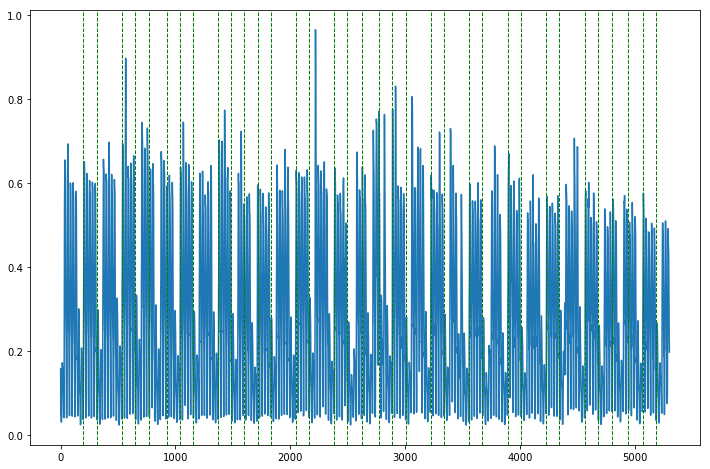

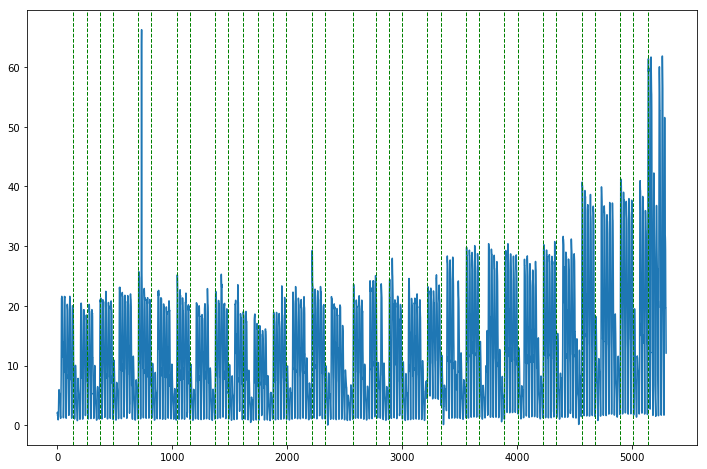

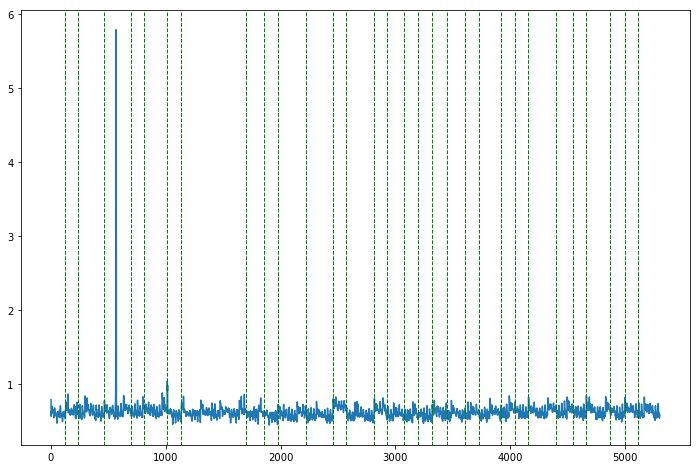

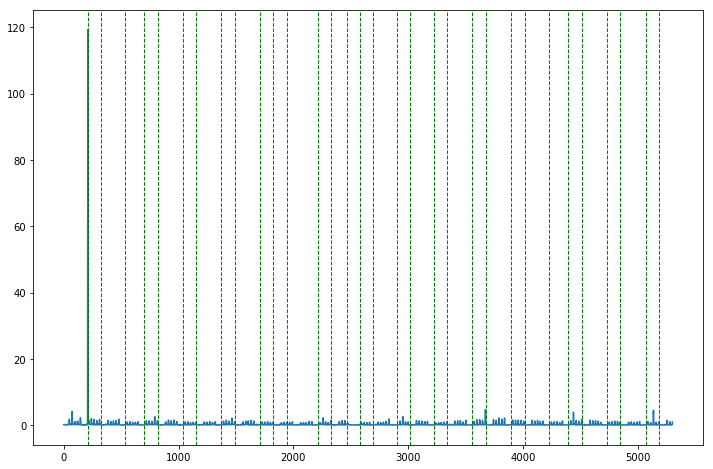

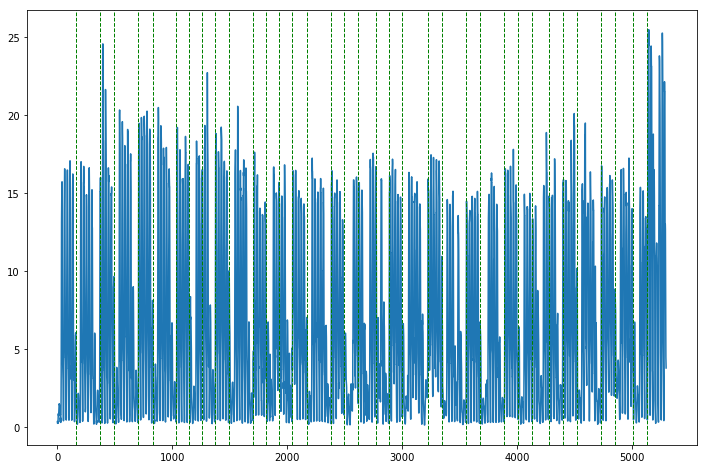

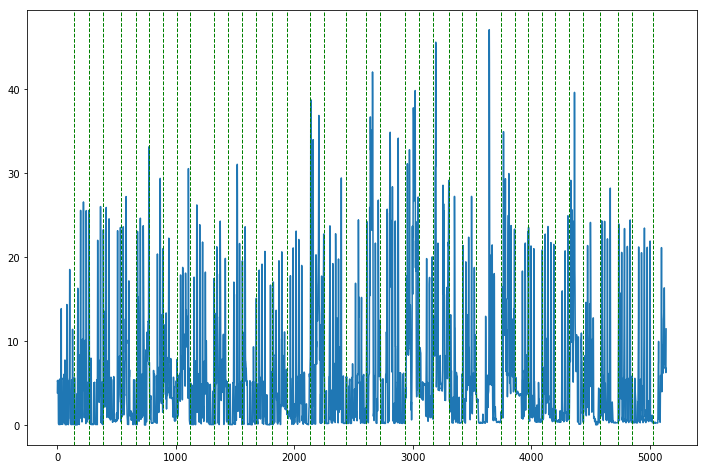

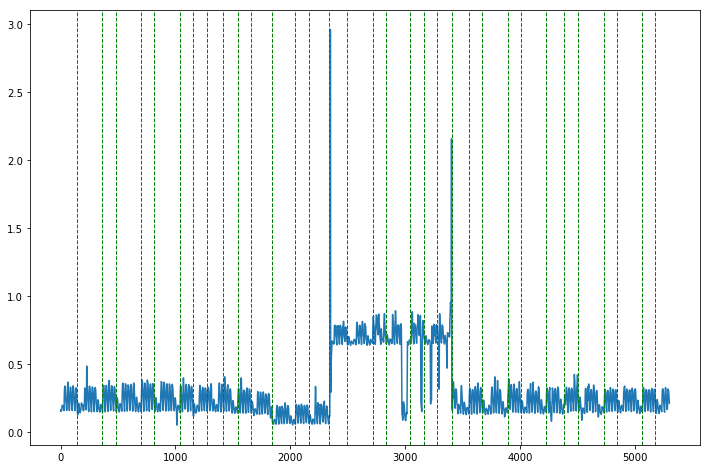

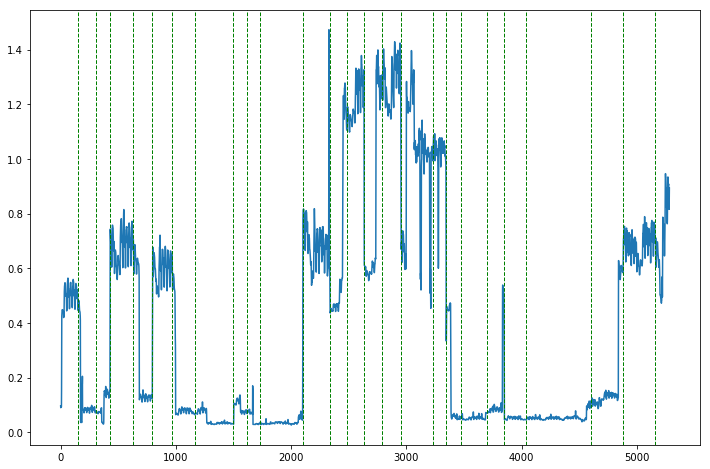

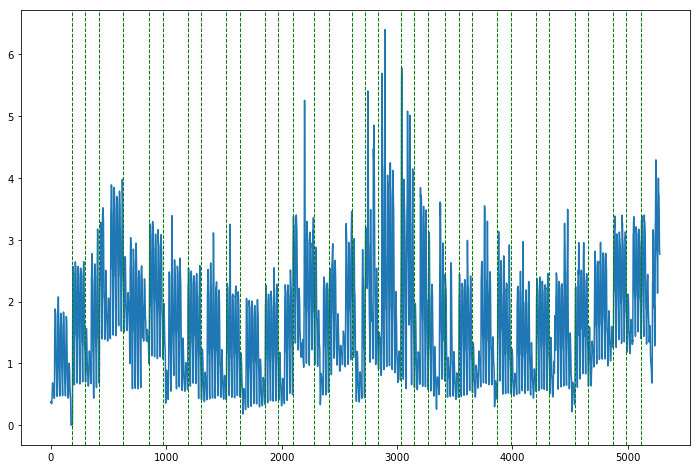

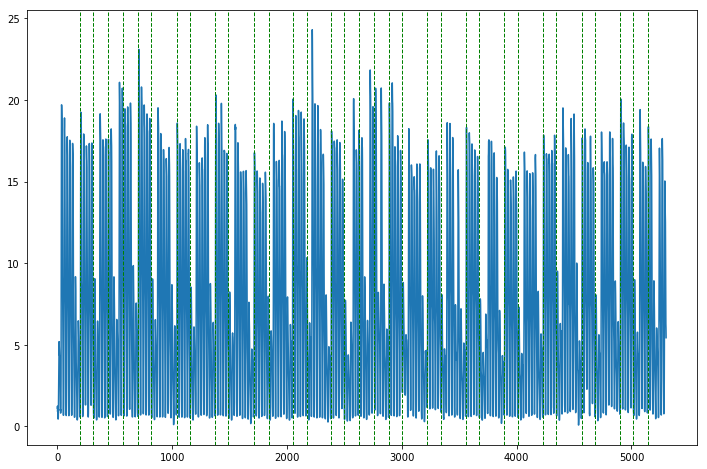

In [8]:
for job in jobs:
    rows = np.where(X[:,0]==job)[0]
    data = X[rows,1:]
    xcoord = np.arange(len(data))
    label = Y[rows]
    
    min_size = int(df.iloc[rows,:].groupby('FK_DateKey')['TIME'].count().mean())*5
    print min_size
    beta = 0.0001
    degree = 1
    args = [min_size,beta,degree]    
    edm_multi.evaluate(X[rows,1],*args)   
    
    
    plt.figure(figsize=(12,8))
    plt.subplot(1,1,1)
    plt.plot(xcoord,data[:,-1])
    loc = edm_multi.getLoc()                   
    for j in loc:
        plt.axvline(j,color='g',ls='dashed',lw="1.0")
plt.show()